In [1]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import seaborn as sns

In [2]:
import pyarrow.parquet as pq
datasource = pq.read_table('escooter_history.parquet')
dataset = datasource.to_pandas()

In [3]:
dataset[['weather']] = dataset[['weather']].replace({'clear, few clouds':1,'cloudy, mist':2, 'light snow or rain or thunderstorm':3, 'heacy rain or thunderstorm or snow or ice pallets':4, })
dataset[['registered']]= dataset[['registered_customer']]
dataset = dataset.drop(columns=['registered_customer'])
dataset[['holiday', 'workingday','registered' ]] = dataset[['holiday', 'workingday','registered']].replace({0:False, 1:True})

In [4]:
dataset['date'] = pd.to_datetime(dataset['datetime']).dt.date
dataset['time'] = pd.to_datetime(dataset['datetime']).dt.time
dataset['weekday'] = pd.to_datetime(dataset['datetime']).dt.day_name()
dataset[['weekday']] = dataset[['weekday']].replace({'Tuesday':2, 'Wednesday':3 ,'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7, 'Monday':1})
dataset['hour'] = pd.to_datetime(dataset['time'], format='%H:%M:%S').dt.hour
dataset["month"] = pd.to_datetime(dataset['date']).dt.month

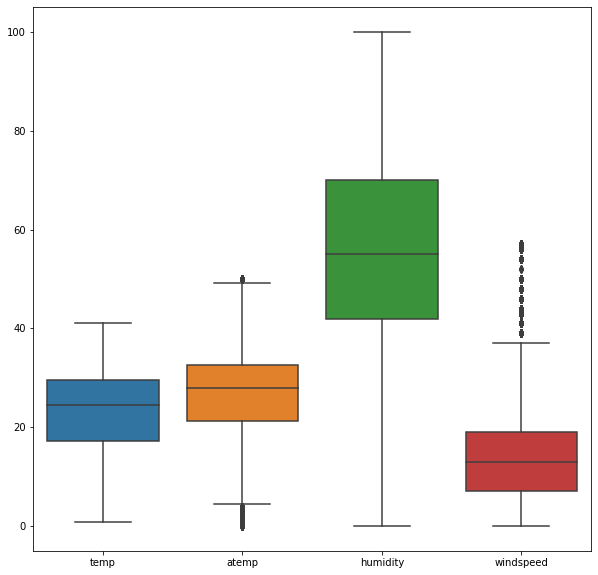

In [5]:

sns.boxplot(data=dataset[['temp',
       'atemp', 'humidity', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

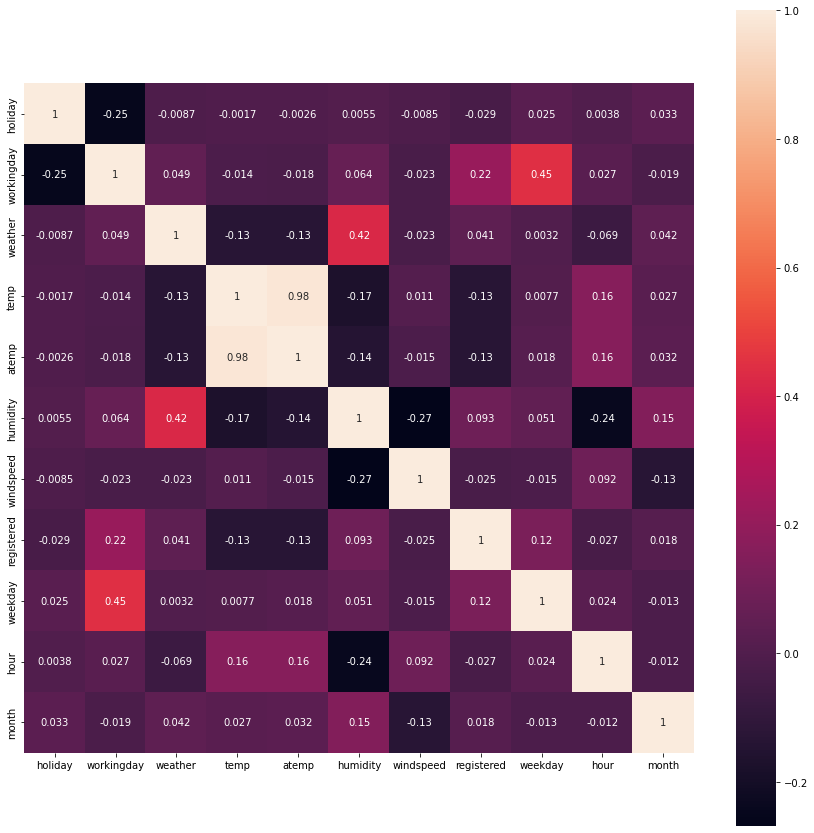

In [37]:
# Korrelationsanalyse
fig = plt.figure(figsize=[15,15])
ax = sns.heatmap(dataset.corr(),annot=True,square=True)

/home/honscha/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


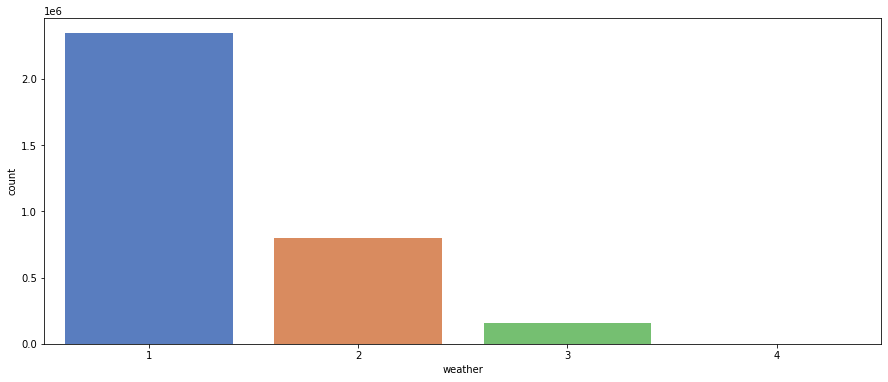

In [7]:
# Verteilung Wetterverhältnisse 
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(dataset.weather,palette="muted")
plt.show()

/home/honscha/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


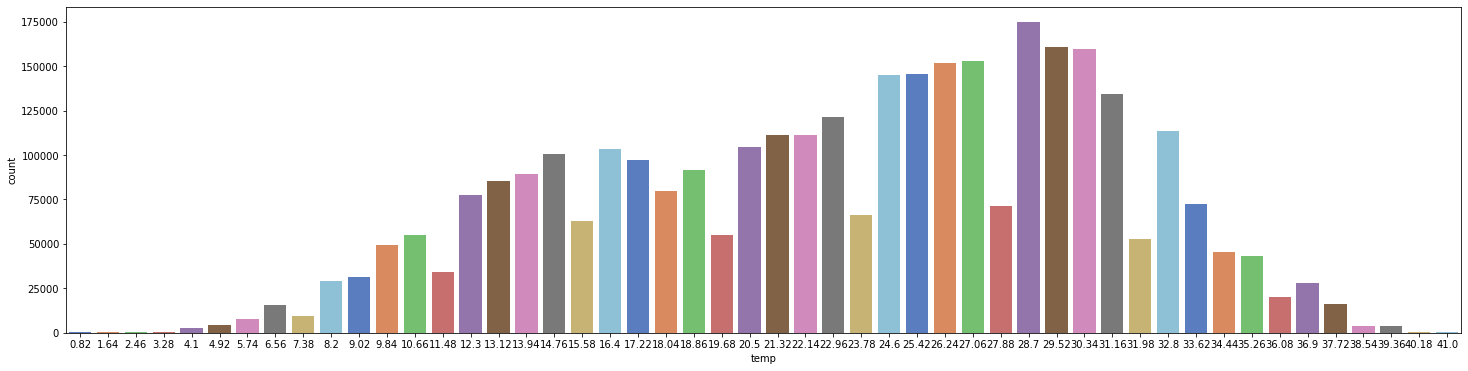

In [8]:
# Temperaturverteilung
f,ax = plt.subplots(figsize=(25,6))
ax = sns.countplot(dataset.temp,palette="muted")
plt.show()

/home/honscha/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


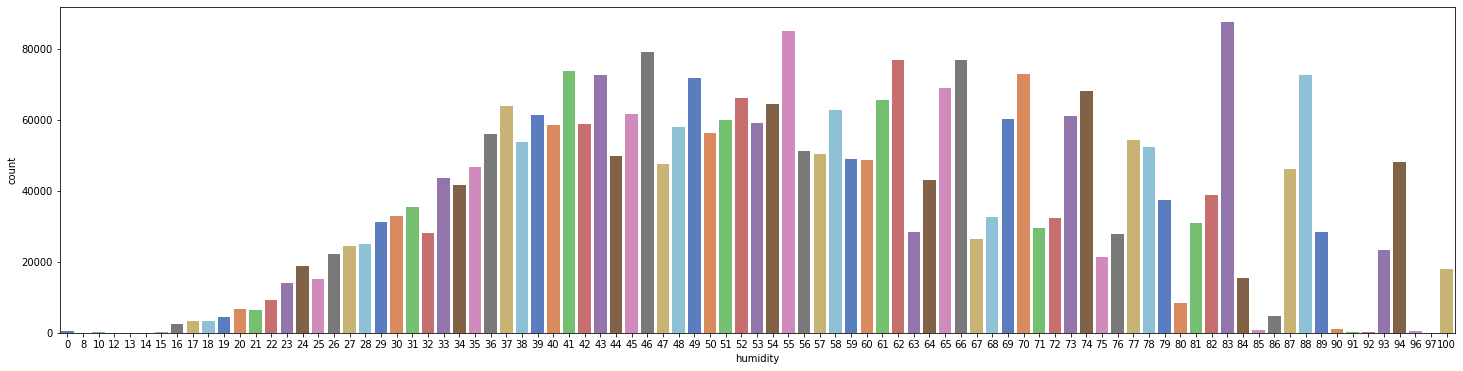

In [9]:
# Verteilung Luftfeuchtigkeit
f,ax = plt.subplots(figsize=(25,6))
ax = sns.countplot(dataset.humidity,palette="muted")
plt.show()

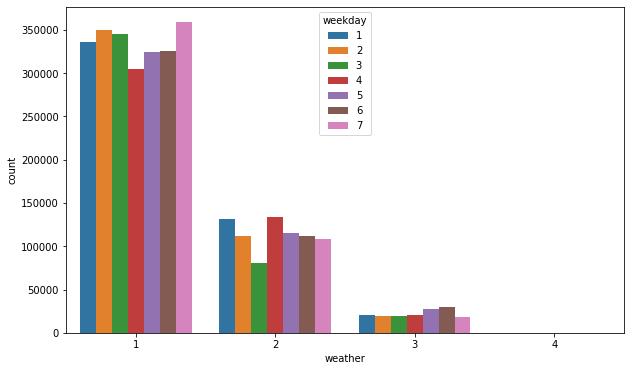

In [10]:
# Verteilung Wetter und Wochentage
plt.figure(figsize=(10,6))
sns.countplot(data = dataset, x = 'weather', hue = 'weekday')

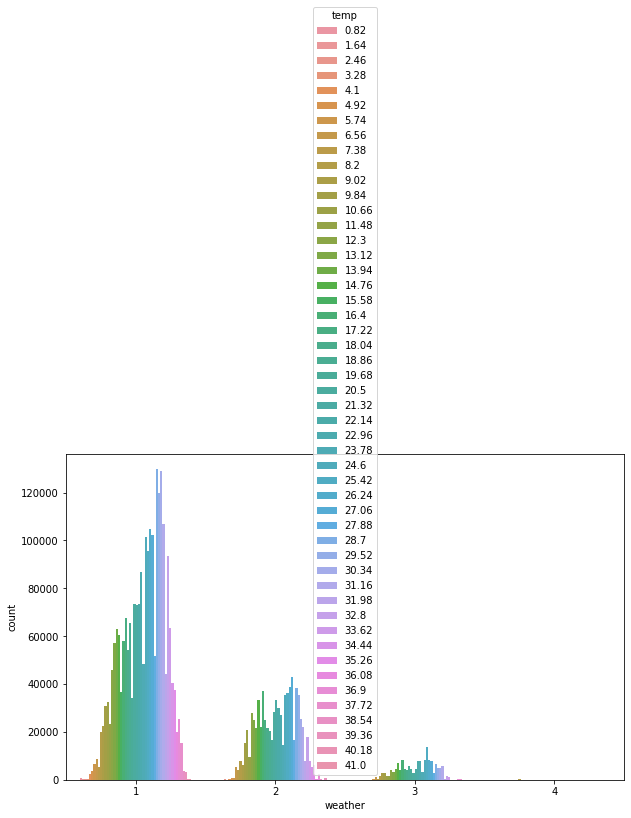

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data = dataset, x = 'weather', hue = 'temp')

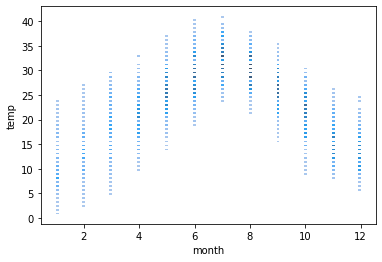

In [12]:
# Verteilung Temperaturen auf Monate
sns.histplot(dataset, x="month", y="temp")

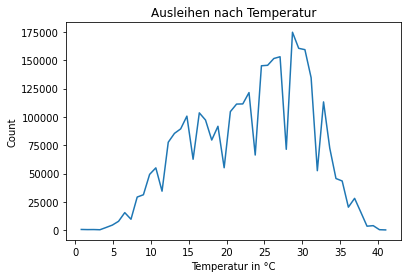

In [13]:
# Temperaturverteilung
df_temp=dataset.groupby(['temp']).size().reset_index(name='counts')
df_temp
plt.title('Ausleihen nach Temperatur')
plt.ylabel('Count')
plt.xlabel('Temperatur in °C')
plt.plot(df_temp.temp,df_temp.counts)

In [14]:
dataset["temp"].quantile([.10, .25, .5, .75,.9])
dataset["temp"].mean()
dataset["temp"].min()
dataset["temp"].max()

41.0

In [15]:
df_date_temp = dataset.groupby('date') \
       .agg({'date':'size', 'temp':'mean'}) \
       .rename(columns={'date':'count','temp':'mean_temp'}) \
       .reset_index()

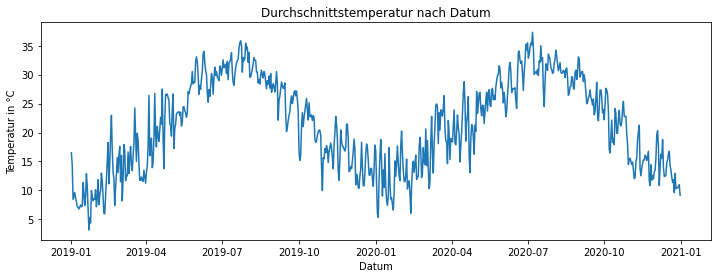

In [16]:
plt.figure(figsize=(12, 4))
plt.title('Durchschnittstemperatur nach Datum')
plt.ylabel('Temperatur in °C')
plt.xlabel('Datum')

plt.plot(df_date_temp.date,df_date_temp.mean_temp)

In [17]:
# Datensatz Windgeschwindigkeit
df_date_wind = dataset.groupby('date') \
       .agg({'date':'size', 'windspeed':'mean'}) \
       .rename(columns={'date':'count','windspeed':'mean_wind'}) \
       .reset_index()

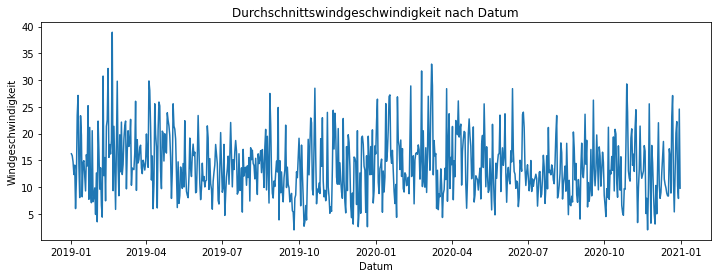

In [18]:
plt.figure(figsize=(12, 4))
plt.title('Durchschnittswindgeschwindigkeit nach Datum')
plt.ylabel('Windgeschwindigkeit')
plt.xlabel('Datum')
plt.plot(df_date_wind.date,df_date_wind.mean_wind)